#### MSTN optimized with tree parzen estimators surrogate
- Metric optimized: AUC

- Number of random evaluations: 20

- Model optimized: single_tel

- Iterations performed: 100 
 
- Space of hyperparameters to optimize: 
    - number of filters layer 1: [16, 64] 
    - number of filters layer 2: [16, 128]
    - number of filters layer 3: [16, 256]
    - number of filters layer 4: [16, 512]
    - kernel size layer 1: [2,10] 
    - kernel size layer 2: [2,10] 
    - kernel size layer 3: [2,10] 
    - kernel size layer 4: [2,10].

#### MSTN optimized with gaussian processes surrogate

Idem

#### MSTN optimized with random forests surrogate

Idem

#### MSTN optimized with gradient boosted trees surrogate

Idem

#### MSTN optimized with random search

Idem

#### Results:

|Model |Telescope Type | Validation Accuracy | Validation AUC | Best iteration |Training Time|
|---|---|---|---|---|---|
|Base|MSTN|78.04%|0.8659|-|0h 58m 10s|
|Optimized with tpe|MSTN|80.11%|0.8929|84 |0h 52m 48s|
|Optimized with gp|MSTN|80.09%|0.8926|93|0h 59m 45s|
|Optimized with rf|MSTN|79.85%|0.8894|12|0h 52m 59s|
|Optimized with gbrt|MSTN|80.33%|0.8920|99|1h 2m 49s|


|Model|Telescope Type |Filters 1|Filters 2|Filters 3|Filters 4| Kernel size 1 | Kernel size 2 | Kernel size 3|Kernel size 4|
|---|---|---|---|---|---|---|---|---|---|
|Base|MSTN |32|32|64|128| 3| 3 |3 | 3|
|Optimized with tpe|MSTN |58|109|183|315|5|8|8|4|
|Optimized with gp|MSTN |64|128|256|239|10|5|10|10|
|Optimized with rf|MSTN |25|110|144|384|9|9|10|7|
|Optimized with gbrt|MSTN |64|120|144|368|3|9|10|7|


|Model|Telescope Type |Metric |Improvement |
|---|---|---|---|
|Optimized with tpe|MSTN|Validation Accuracy |2.07%|
|Optimized with tpe|MSTN |Validation AUC| 2.70%|
|Optimized with gp|MSTN |Validation Accuracy |2.05%|
|Optimized with gp|MSTN|Validation AUC| 2.67%|
|Optimized with rf|MSTN |Validation Accuracy |1.81%|
|Optimized with rf|MSTN|Validation AUC| 2.35%|
|Optimized with gbrt|MSTN |Validation Accuracy |2.29%|
|Optimized with gbrt|MSTN|Validation AUC| 2.61%|


In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skopt.plots import plot_evaluations, plot_objective
from ctlearn_optimizer.auxiliar_functions import df2result, plot_convergence
pd.set_option('display.max_columns', None)

mstn_tpe = pd.read_csv('mstn_tpe.csv')
mstn_gp = pd.read_csv('mstn_gp.csv')
mstn_rf = pd.read_csv('mstn_rf.csv')
mstn_gbrt = pd.read_csv('mstn_gbrt.csv')
mstn_random = pd.read_csv('mstn_random.csv')

mstn_tpe_result = df2result(mstn_tpe, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])
mstn_gp_result = df2result(mstn_gp, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])
mstn_rf_result = df2result(mstn_rf, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])
mstn_gbrt_result = df2result(mstn_gbrt, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])
mstn_random_result = df2result(mstn_random, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])

In [4]:
# NectarCam optimized with tree_parzen_estimators
mstn_tpe_sorted = mstn_tpe.sort_values('auc_val', ascending = False)
mstn_tpe_sorted.head(10)

,iteration,loss,layer1_filters,layer1_kernel,layer2_filters,layer2_kernel,layer3_filters,layer3_kernel,layer4_filters,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
83,84,0.107111,58.0,5.0,109.0,8.0,183.0,8.0,315.0,4.0,0.892889,0.801051,0.858612,0.747094,0.821363,3167.990778
82,83,0.107507,59.0,6.0,124.0,7.0,189.0,10.0,207.0,4.0,0.892493,0.797940,0.868293,0.731991,0.827550,3159.622981
71,72,0.107807,62.0,6.0,94.0,6.0,204.0,10.0,130.0,4.0,0.892193,0.802589,0.827305,0.779421,0.819639,3043.263056
63,64,0.108042,49.0,5.0,109.0,5.0,204.0,6.0,414.0,4.0,0.891958,0.802729,0.824535,0.782288,0.819942,6947.555477
33,34,0.108045,44.0,10.0,120.0,6.0,194.0,10.0,133.0,10.0,0.891955,0.802461,0.792506,0.811793,0.825479,5820.490232
96,97,0.108167,61.0,6.0,76.0,7.0,197.0,7.0,252.0,4.0,0.891833,0.802496,0.814661,0.791092,0.821688,3053.249457
53,54,0.108297,50.0,8.0,86.0,6.0,234.0,9.0,186.0,5.0,0.891703,0.801925,0.818274,0.786600,0.821696,5546.827348
85,86,0.108307,57.0,6.0,99.0,10.0,144.0,10.0,236.0,5.0,0.891693,0.800771,0.846908,0.757523,0.823168,3306.023628
75,76,0.108362,54.0,4.0,111.0,4.0,146.0,10.0,473.0,4.0,0.891638,0.803218,0.817985,0.789376,0.821627,3045.882030
87,88,0.108501,60.0,5.0,122.0,9.0,219.0,10.0,295.0,5.0,0.891499,0.801750,0.834481,0.771068,0.821353,4626.238879


In [5]:
# NectarCam optimized with gaussian processes surrogate
mstn_gp_sorted = mstn_gp.sort_values('auc_val', ascending = False)
mstn_gp_sorted.head(10)

,loss,iteration,layer1_filters,layer2_filters,layer3_filters,layer4_filters,layer1_kernel,layer2_kernel,layer3_kernel,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
92,0.107388,93,64.0,128.0,256.0,239.0,10.0,5.0,10.0,10.0,0.892612,0.800930,0.777606,0.823755,0.825392,3585.451714
49,0.108346,50,30.0,122.0,253.0,292.0,6.0,6.0,7.0,10.0,0.891654,0.802131,0.800667,0.803563,0.820788,3474.704604
84,0.108458,85,64.0,128.0,256.0,512.0,2.0,6.0,10.0,8.0,0.891542,0.802950,0.844383,0.762401,0.822343,4077.138633
93,0.108585,94,64.0,128.0,256.0,512.0,10.0,6.0,10.0,8.0,0.891415,0.802636,0.828790,0.777040,0.819367,4140.540171
20,0.108707,21,64.0,128.0,256.0,512.0,10.0,10.0,10.0,10.0,0.891293,0.800099,0.774065,0.825577,0.831538,4840.163612
26,0.108767,27,64.0,128.0,256.0,512.0,10.0,5.0,10.0,10.0,0.891233,0.801940,0.804140,0.799787,0.824738,4091.363066
90,0.108907,91,58.0,123.0,245.0,190.0,10.0,7.0,10.0,5.0,0.891093,0.798662,0.763466,0.833108,0.841569,3330.260143
38,0.109082,39,19.0,87.0,253.0,494.0,3.0,6.0,10.0,9.0,0.890918,0.799448,0.778605,0.819846,0.828655,3431.221833
80,0.109110,81,56.0,128.0,245.0,153.0,10.0,9.0,10.0,3.0,0.890890,0.801154,0.786640,0.815359,0.827399,3892.115257
88,0.109235,89,39.0,127.0,238.0,391.0,6.0,6.0,10.0,3.0,0.890765,0.802445,0.814082,0.791057,0.824371,3196.673680


In [7]:
# NectarCam optimized with random forests surrogate
mstn_rf_sorted = mstn_rf.sort_values('auc_val', ascending = False)
mstn_rf_sorted.head(10)

,loss,iteration,layer1_filters,layer2_filters,layer3_filters,layer4_filters,layer1_kernel,layer2_kernel,layer3_kernel,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
11,0.110555,12,25.0,110.0,144.0,384.0,9.0,9.0,10.0,7.0,0.889445,0.798493,0.781261,0.815359,0.837409,3179.208987
34,0.110851,35,54.0,22.0,145.0,307.0,7.0,9.0,10.0,9.0,0.889149,0.796102,0.755430,0.835906,0.844128,3121.696087
24,0.111277,25,25.0,118.0,38.0,348.0,5.0,4.0,9.0,10.0,0.888723,0.799975,0.793268,0.806540,0.833479,3144.953001
79,0.111611,80,54.0,70.0,129.0,363.0,6.0,3.0,5.0,8.0,0.888389,0.799313,0.846880,0.752760,0.835857,3173.113964
33,0.112087,34,44.0,26.0,124.0,312.0,7.0,9.0,9.0,7.0,0.887913,0.799178,0.818735,0.780039,0.833329,3140.244232
1,0.112132,2,59.0,49.0,163.0,53.0,5.0,5.0,7.0,7.0,0.887868,0.800593,0.812788,0.788658,0.836843,3158.273448
88,0.112407,89,54.0,83.0,147.0,341.0,9.0,5.0,7.0,2.0,0.887593,0.800683,0.807590,0.793922,0.839493,3157.046487
3,0.112453,4,64.0,115.0,88.0,346.0,7.0,8.0,6.0,7.0,0.887547,0.800189,0.813923,0.786747,0.835294,3110.253458
30,0.112585,31,17.0,115.0,41.0,338.0,6.0,5.0,9.0,7.0,0.887415,0.797011,0.771977,0.821512,0.844143,3166.695284
2,0.112698,3,27.0,119.0,129.0,472.0,3.0,6.0,4.0,10.0,0.887302,0.800076,0.811381,0.789013,0.836759,3141.610983


In [8]:
# NectarCam optimized with gradient boosted trees surrogate
mstn_gbrt_sorted = mstn_gbrt.sort_values('auc_val', ascending = False)
mstn_gbrt_sorted.head(10)

,loss,iteration,layer1_filters,layer2_filters,layer3_filters,layer4_filters,layer1_kernel,layer2_kernel,layer3_kernel,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
98,0.107957,99,64.0,120.0,144.0,368.0,3.0,9.0,10.0,7.0,0.892043,0.803332,0.814354,0.792545,0.823086,3769.405584
93,0.108085,94,64.0,128.0,217.0,197.0,4.0,9.0,8.0,8.0,0.891915,0.802535,0.860408,0.745896,0.824459,3990.045641
91,0.108446,92,64.0,126.0,155.0,418.0,5.0,9.0,10.0,7.0,0.891554,0.802760,0.846018,0.760424,0.822526,3932.258488
32,0.108470,33,64.0,127.0,134.0,108.0,6.0,9.0,7.0,10.0,0.891530,0.797730,0.752934,0.841571,0.841654,3584.276868
31,0.108936,32,61.0,121.0,183.0,331.0,4.0,8.0,10.0,7.0,0.891064,0.800099,0.780489,0.819291,0.830747,3415.563201
30,0.109225,31,64.0,119.0,161.0,300.0,2.0,8.0,7.0,7.0,0.890775,0.798886,0.768073,0.829042,0.836243,3287.608698
84,0.109245,85,64.0,115.0,163.0,374.0,5.0,10.0,10.0,8.0,0.890755,0.801727,0.797081,0.806273,0.829654,3922.855412
56,0.109644,57,64.0,124.0,176.0,237.0,7.0,3.0,7.0,9.0,0.890356,0.801794,0.845178,0.759335,0.827858,3140.953111
33,0.109750,34,63.0,123.0,235.0,386.0,3.0,9.0,5.0,8.0,0.890250,0.801603,0.839821,0.764200,0.827260,3753.658834
3,0.109823,4,64.0,115.0,88.0,346.0,7.0,8.0,6.0,7.0,0.890177,0.801345,0.791384,0.811094,0.830986,3161.962466


In [9]:
# NectarCam optimized with random search
mstn_random_sorted = mstn_random.sort_values('auc_val', ascending = False)
mstn_random_sorted.head(10)

,loss,iteration,layer1_filters,layer2_filters,layer3_filters,layer4_filters,layer1_kernel,layer2_kernel,layer3_kernel,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
15,0.107249,16,43.0,121.0,249.0,494.0,5.0,6.0,6.0,9.0,0.892751,0.803882,0.813764,0.794211,0.817045,4713.880727
65,0.109556,66,46.0,111.0,130.0,328.0,7.0,3.0,10.0,9.0,0.890444,0.798864,0.769322,0.827776,0.833634,3441.692499
19,0.109655,20,61.0,87.0,233.0,459.0,5.0,9.0,5.0,5.0,0.890345,0.801940,0.804662,0.799276,0.827184,3829.715509
20,0.110015,21,35.0,72.0,166.0,436.0,7.0,7.0,10.0,5.0,0.889985,0.801536,0.815217,0.788147,0.827923,3150.214954
70,0.110091,71,54.0,116.0,136.0,342.0,7.0,9.0,4.0,8.0,0.889909,0.800413,0.859001,0.743075,0.831390,4065.117532
74,0.110491,75,60.0,82.0,168.0,501.0,9.0,7.0,5.0,5.0,0.889509,0.799111,0.780920,0.816914,0.833311,3108.474698
12,0.110725,13,56.0,67.0,234.0,258.0,6.0,4.0,4.0,10.0,0.889275,0.800885,0.788025,0.813470,0.837184,3351.601148
83,0.110917,84,36.0,87.0,181.0,357.0,7.0,5.0,6.0,10.0,0.889083,0.798774,0.860885,0.737988,0.842541,3637.590533
34,0.111059,35,27.0,70.0,202.0,300.0,5.0,9.0,8.0,7.0,0.888941,0.800514,0.833057,0.768665,0.829541,3691.430682
90,0.111084,91,61.0,95.0,149.0,127.0,2.0,6.0,10.0,4.0,0.888916,0.799874,0.849036,0.751760,0.834179,3785.094102


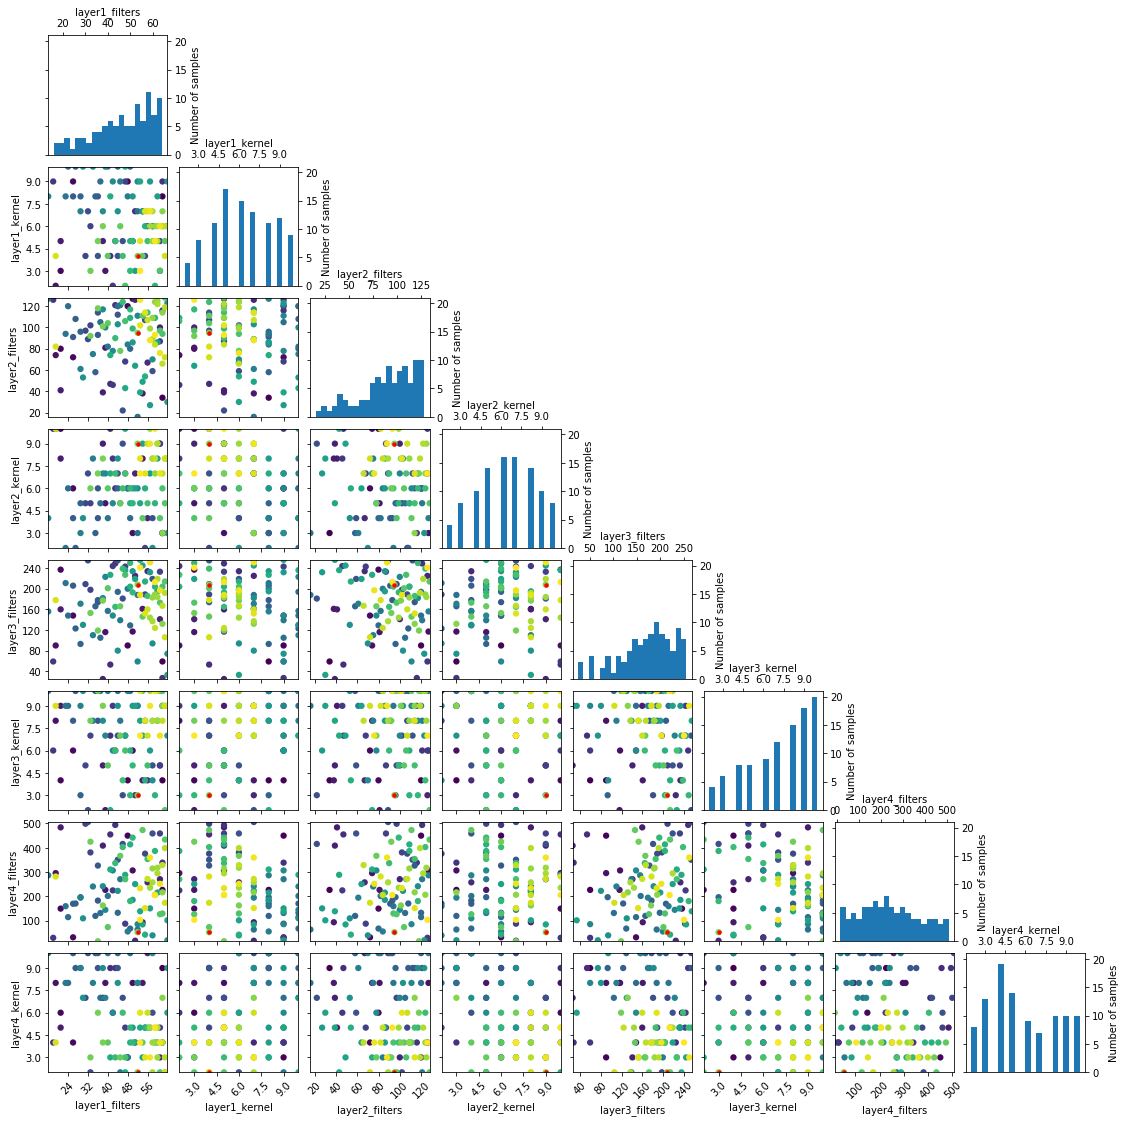

In [10]:
# NectarCam optimized with tree_parzen_estimators
plot_evaluations(mstn_tpe_result)
plt.show()

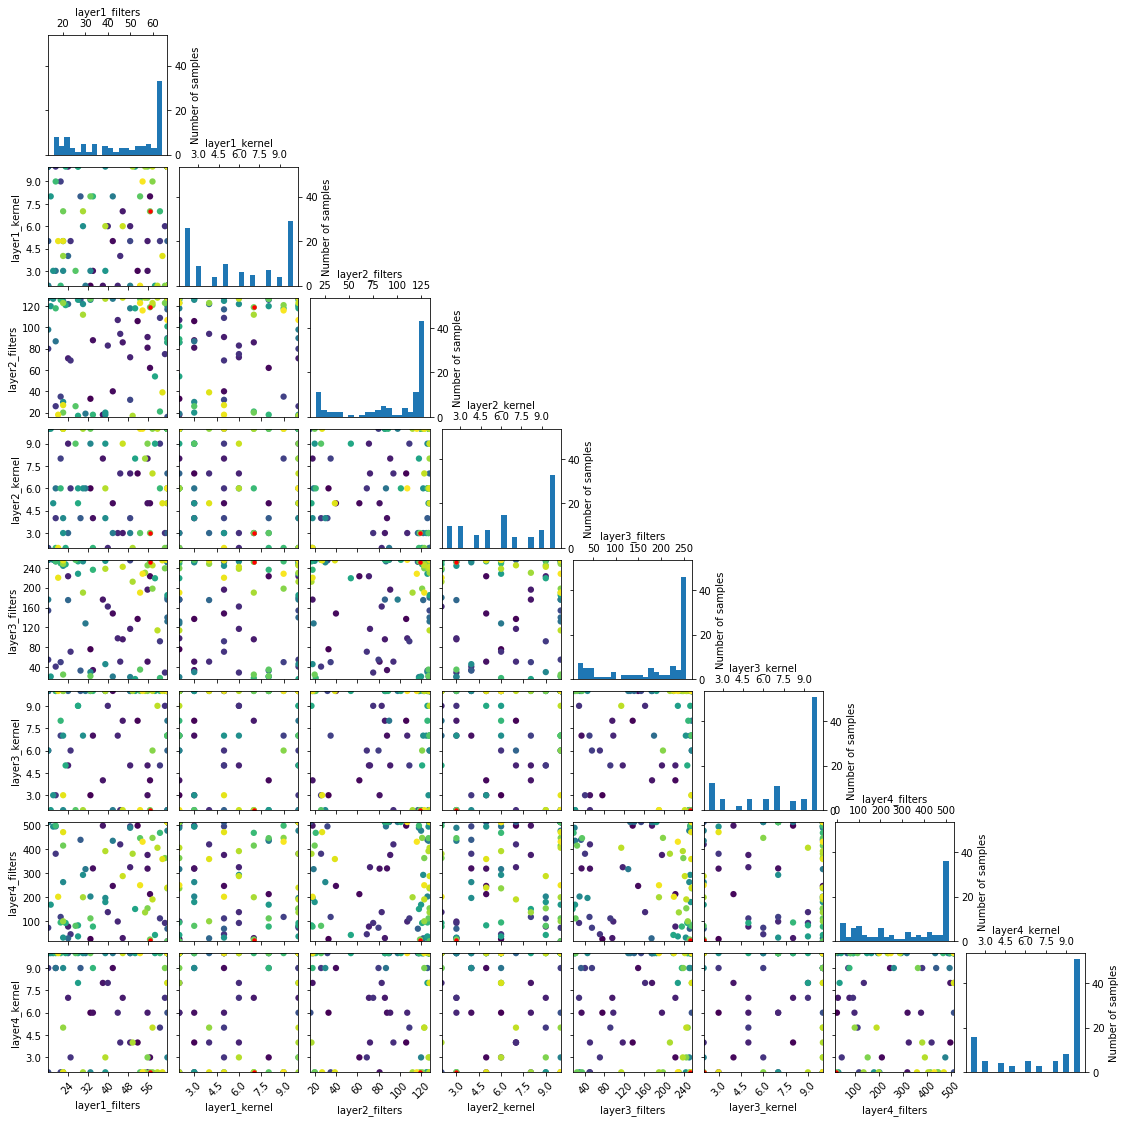

In [11]:
# NectarCam optimized with gaussian_processes surrogate
plot_evaluations(mstn_gp_result)
plt.show()

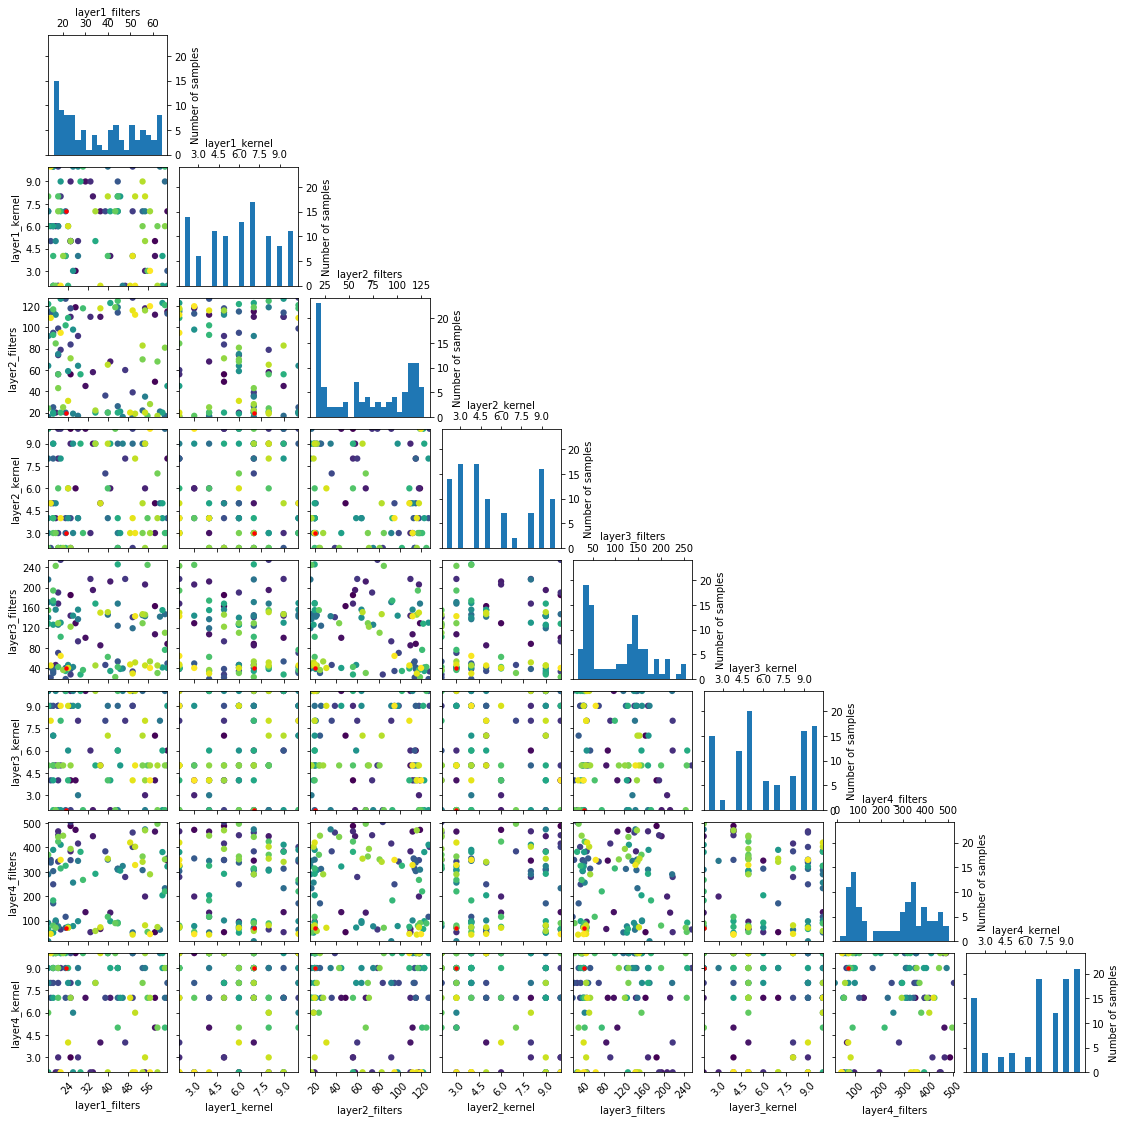

In [12]:
# NectarCam optimized with random forests surrogate
plot_evaluations(mstn_rf_result)
plt.show()

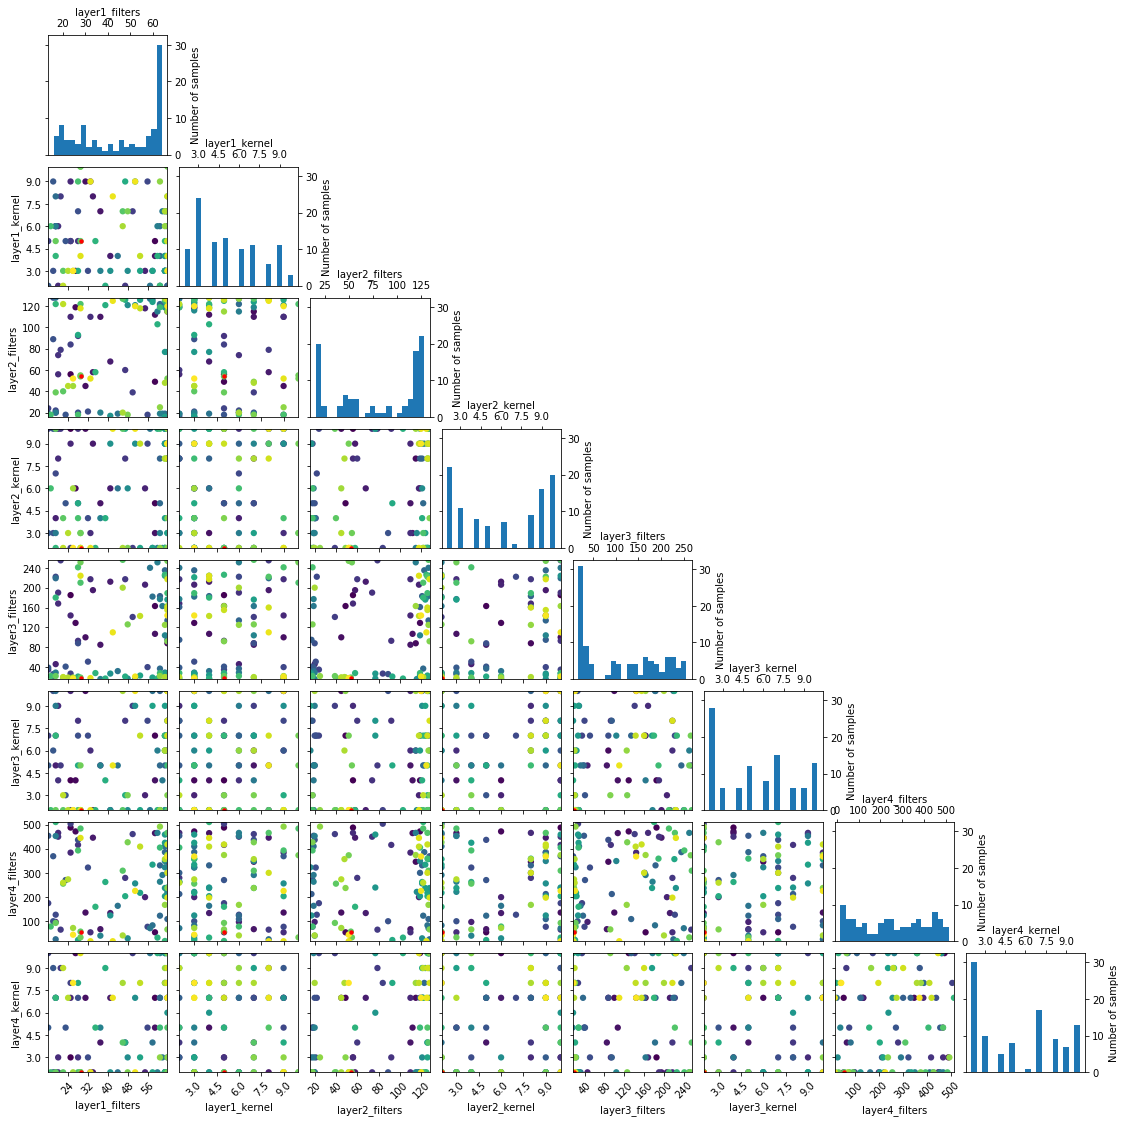

In [13]:
# NectarCam optimized with gradient boosted trees surrogate
plot_evaluations(mstn_gbrt_result)
plt.show()

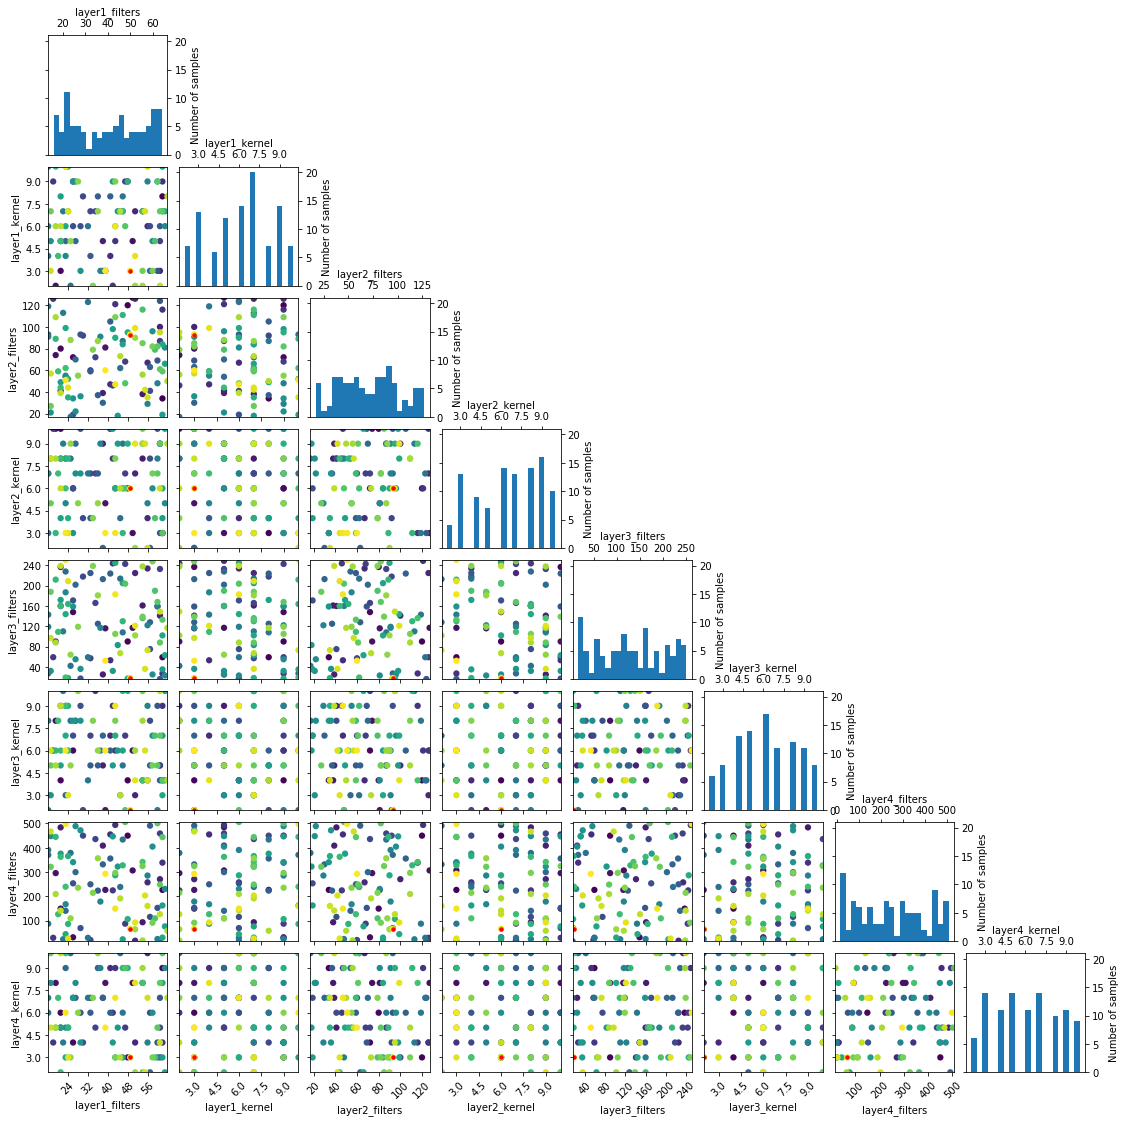

In [14]:
# NectarCam optimized with random_search
plot_evaluations(mstn_random_result)
plt.show()

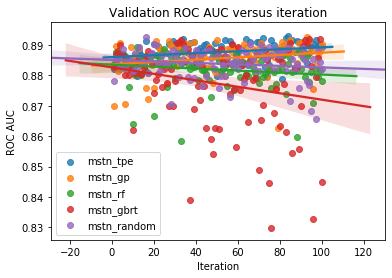

In [15]:
sns.regplot(mstn_tpe['iteration'], mstn_tpe['auc_val'], label = 'mstn_tpe')
sns.regplot(mstn_gp['iteration'], mstn_gp['auc_val'], label = 'mstn_gp')
sns.regplot(mstn_rf['iteration'], mstn_rf['auc_val'], label = 'mstn_rf')
sns.regplot(mstn_gbrt['iteration'], mstn_gbrt['auc_val'], label = 'mstn_gbrt')
sns.regplot(mstn_random['iteration'], mstn_random['auc_val'], label = 'mstn_random')

plt.xlabel('Iteration');plt.ylabel('ROC AUC' ); plt.title('Validation ROC AUC versus iteration'), plt.legend(loc="best");

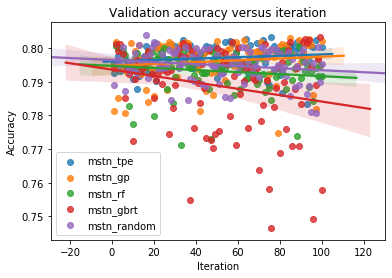

In [16]:
sns.regplot(mstn_tpe['iteration'], mstn_tpe['acc_val'], label = 'mstn_tpe')
sns.regplot(mstn_gp['iteration'], mstn_gp['acc_val'], label = 'mstn_gp')
sns.regplot(mstn_rf['iteration'], mstn_rf['acc_val'], label = 'mstn_rf')
sns.regplot(mstn_gbrt['iteration'], mstn_gbrt['acc_val'], label = 'mstn_gbrt')
sns.regplot(mstn_random['iteration'], mstn_random['acc_val'], label = 'mstn_random')

plt.xlabel('Iteration');plt.ylabel('ROC AUC' ); plt.title('Validation ROC AUC versus iteration'), plt.legend(loc="best");
plt.xlabel('Iteration');plt.ylabel('Accuracy' ); plt.title('Validation accuracy versus iteration'),plt.legend(loc="best");

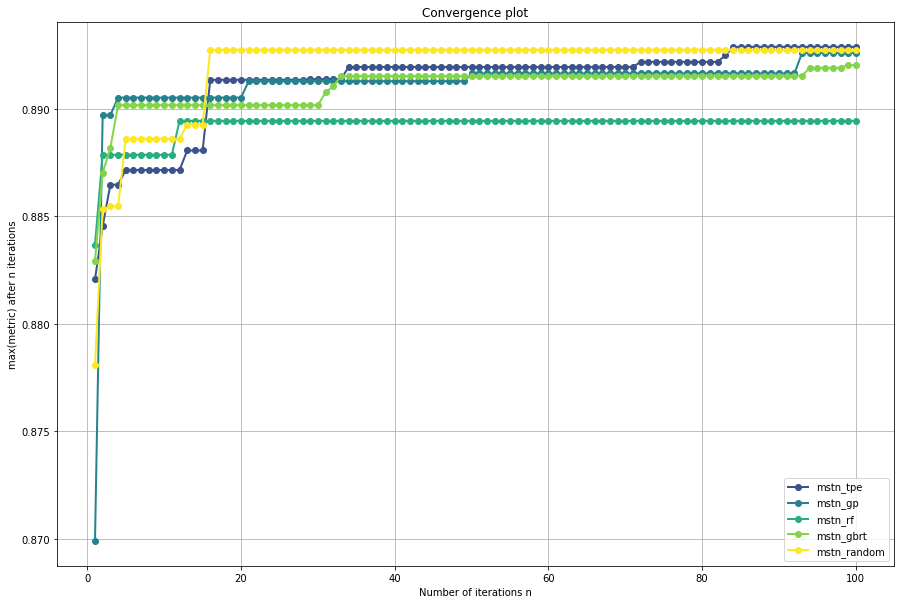

In [17]:
results = [('mstn_tpe', mstn_tpe_result),('mstn_gp', mstn_gp_result),('mstn_rf', mstn_rf_result), 
           ('mstn_gbrt', mstn_gbrt_result),('mstn_random', mstn_random_result)]

plt.figure(figsize=(15,10))
plot_convergence(*results)
plt.show()

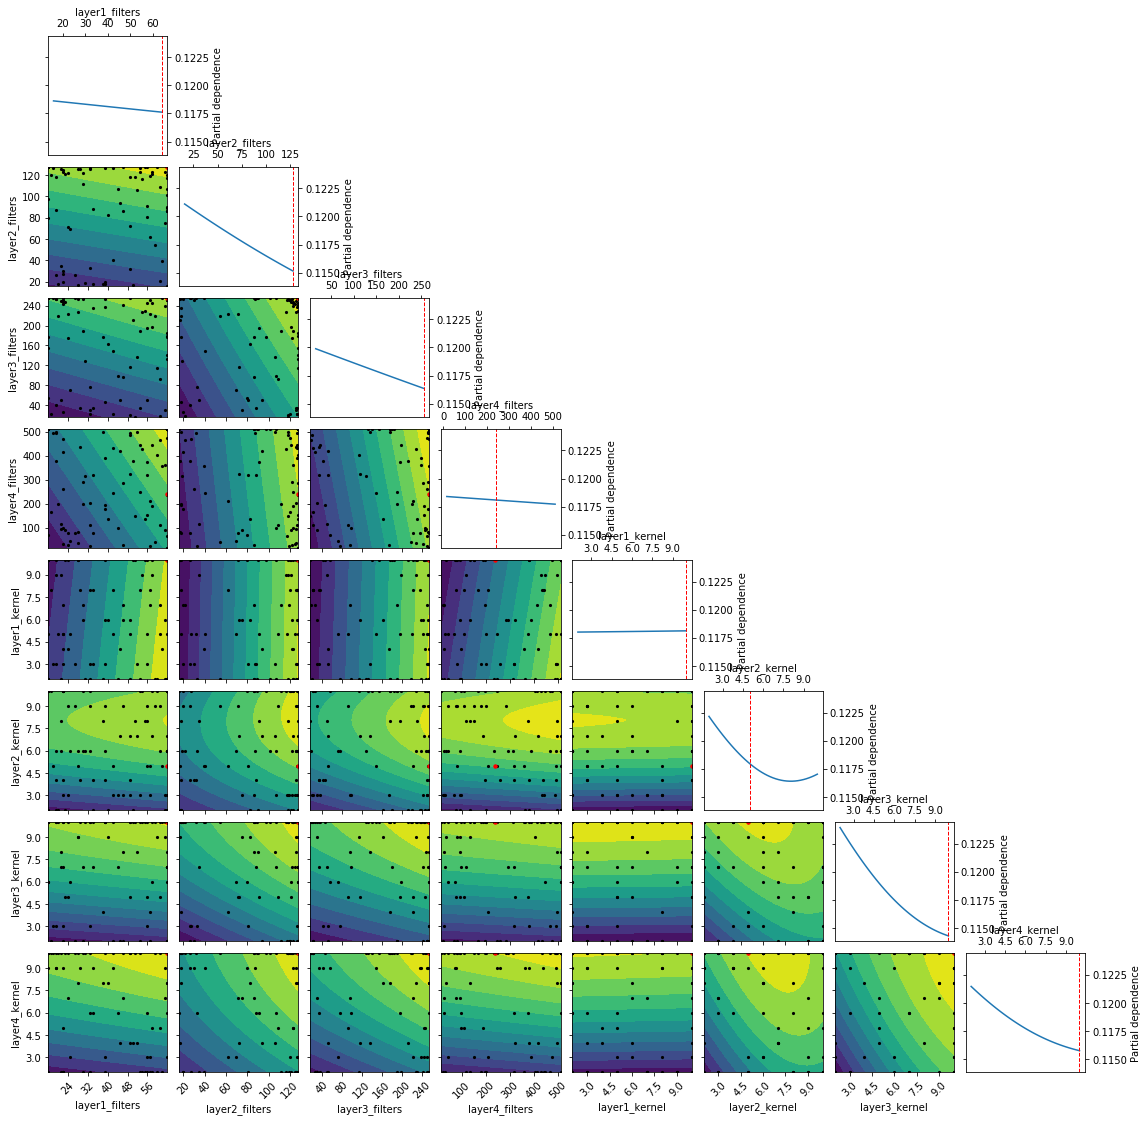

In [9]:
# gaussian processes surrogate

gp_model = pickle.load(open('gp_model.pkl', 'rb'))

plot_objective(gp_model, dimensions = ['layer1_filters', 'layer2_filters', 'layer3_filters', 'layer4_filters', 
                                       'layer1_kernel','layer2_kernel','layer3_kernel','layer4_kernel'])
plt.show()

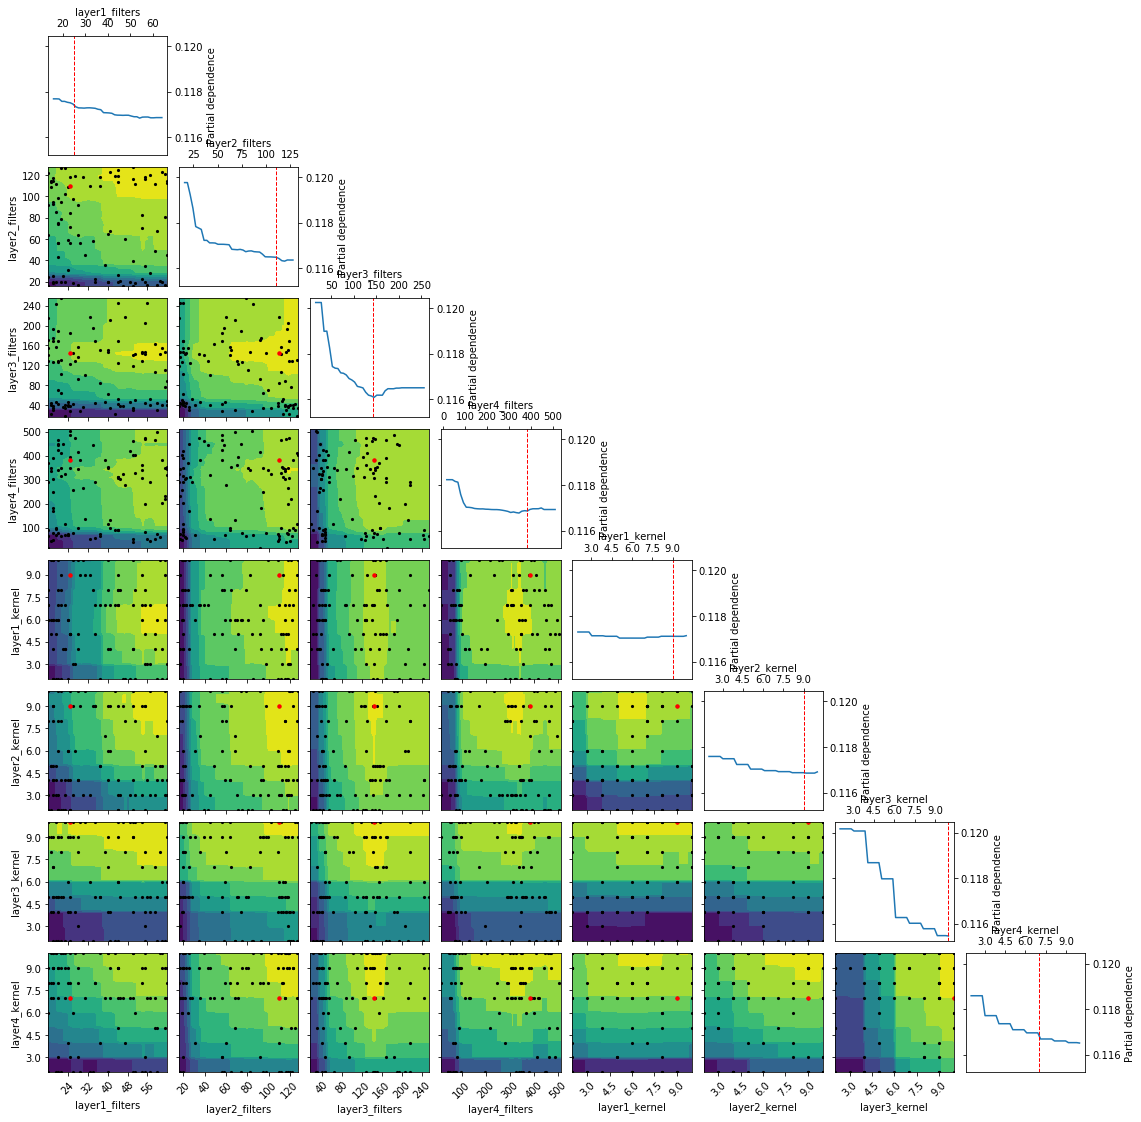

In [3]:
# random forests surrogate

rf_model = pickle.load(open('rf_model.pkl', 'rb'))

plot_objective(rf_model, dimensions = ['layer1_filters', 'layer2_filters', 'layer3_filters', 'layer4_filters', 
                                       'layer1_kernel','layer2_kernel','layer3_kernel','layer4_kernel'])
plt.show()

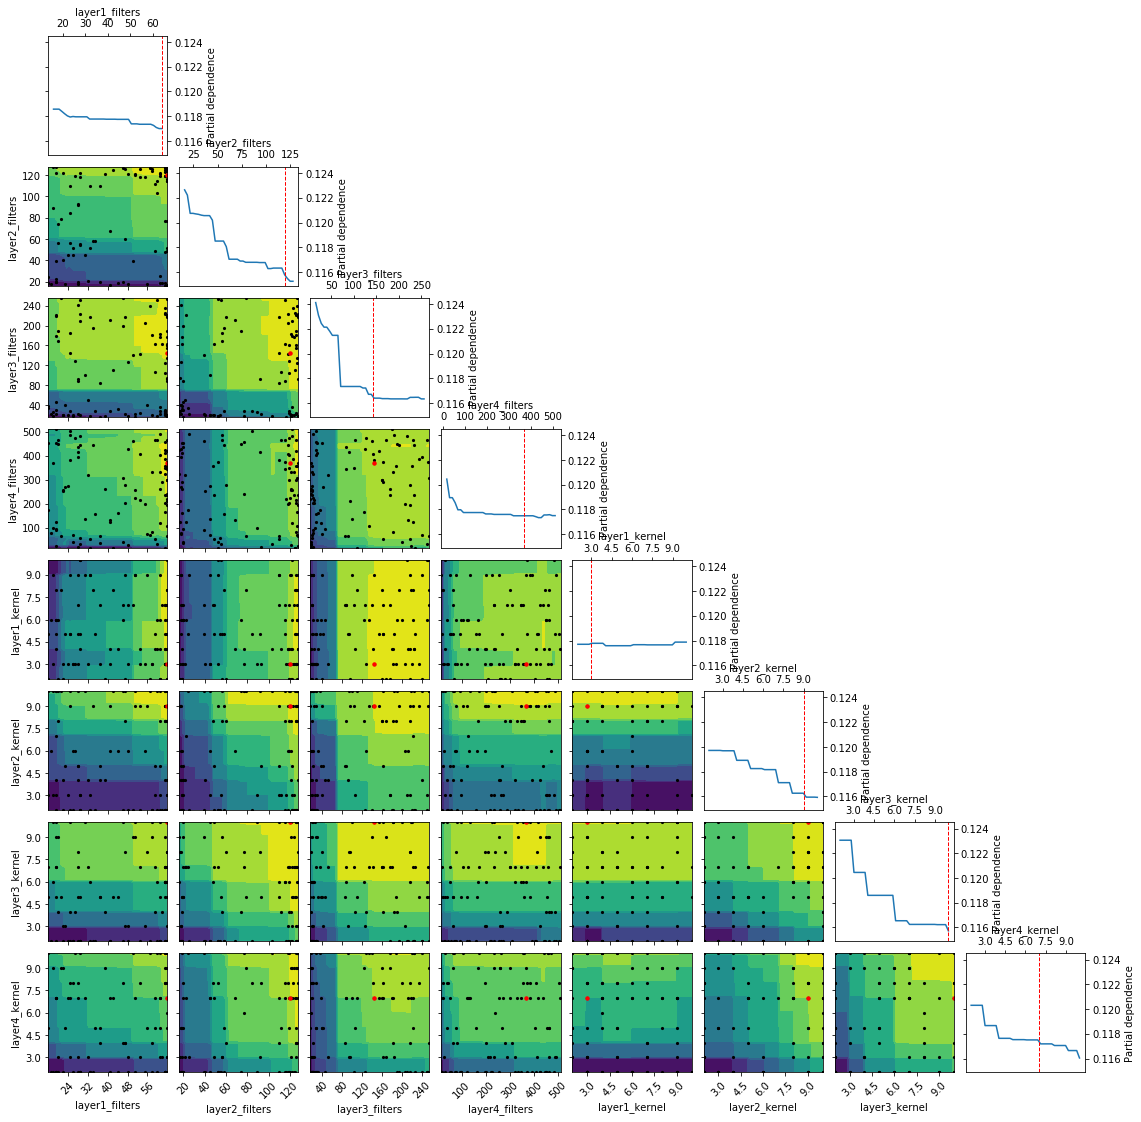

In [11]:
# gradient boosted trees surrogate

gbrt_model = pickle.load(open('gbrt_model.pkl', 'rb'))

plot_objective(gbrt_model, dimensions = ['layer1_filters', 'layer2_filters', 'layer3_filters', 'layer4_filters', 
                                       'layer1_kernel','layer2_kernel','layer3_kernel','layer4_kernel'])
plt.show()